## **YOLOv5 for Bush Predation Study**

#Install Dependencies

 Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!git clone https://github.com/roboflow-ai/yolov5  # clone repo, forked via https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt  # install dependencies
#Will demand runtime is restarted , do this and rerun the cell

Cloning into 'yolov5'...
remote: Enumerating objects: 313, done.
remote: Total 313 (delta 0), reused 0 (delta 0), pack-reused 313
Receiving objects: 100% (313/313), 3.03 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (198/198), done.
     |████████████████████████████████| 20.4MB 6.5MB/s 
     |████████████████████████████████| 49.5MB 61kB/s 
Requirement already up-to-date: torch>=1.5 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (1.7.0+cu101)
     |████████████████████████████████| 11.6MB 40.8MB/s 
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 6)) (2.0.2)
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 2.2MB 39.9MB/s 
     |████████████████████████████████| 10.6MB 37.2MB/s 
     |████████████████████████████████| 276kB 44.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')





# After weights have been trained and moved to google drive they must be uploaded to new sessions of Colab as sessions cannot be saved
#Delete automatically downloaded weights /content/yolov5/weights/download_weights.sh , mount Gdrive then drop and drag saved weights from Google Drive into the Weights folder
#If this doesn't work download the weights from Gdrive and upload to the weights folder

Mounted at /content/gdrive


In [ ]:
# change directory to our newly cloned YOLOv5 folder
%cd /content/yolov5

/content/yolov5


In [ ]:
#solved issue with torchvision package, now obsolete but may occur again with further updates
#pip install torchvision
#!pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://s3.eu-central-1.amazonaws.com/pytorch-geometric.com/whl/torch-1.4.0.html
# import requirements
#!pip install -q torch==1.5.0 torchvision

In [ ]:

import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets


print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)




![YOLOv5 PyTorch export]!


In [ ]:
#Creates link to weight training dataset on Roboflow
#Would require new roboflow account and associated link in ""
#link found under export dataset
%cd /content
!curl -L "https://app.roboflow.ai/ds/lNNjAhE0Zj?key=Vhfj03dEbC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    68  100    68    0     0    142      0 --:--:-- --:--:-- --:--:--   142
100   896  100   896    0     0    547      0  0:00:01  0:00:01 --:--:--   996
100 9295k  100 9295k    0     0  1893k      0  0:00:04  0:00:04 --:--:-- 4518k
Archive:  roboflow.zip
 extracting: test/images/C04_2019-04-27_06-51-13_JPG.rf.422e5c28f50bd08a91464b742d6e4ca7.jpg  
 extracting: test/images/C02_2019-04-30_16-55-38_JPG.rf.558ed08333cc5aab9d80dba09a4f3130.jpg  
 extracting: test/images/C02_2019-04-19_07-14-07_JPG.rf.5b4dc509e409cc3c91fa6e94d405fc76.jpg  
 extracting: test/images/C02_2019-04-25_18-57-29_JPG.rf.0d61cf9938baf7a7d55f62d5aa8062c2.jpg  
 extracting: test/images/Cormorant _jpg.rf.6c32ca622aad3b095891163b3fe0d7b2.jpg  
 extracting: test/images/photo-1571673481046-9925ac7e39aa_jpg.rf.7252d2acbaf9e78022633005383f48c3.jpg  
 extrac

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 3
', 'Heron']

# Define Model Configuration and Architecture

Writes a yaml script that defines the parameters for the model inc the number of classes, anchors, and each layer.



In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cd /content/
with open('yolov5/models/custom_yolov5s.yaml', 'w') as f:
  # parameters
  f.write('nc: ' + num_classes + '\n')
  #f.write('nc: ' + str(len(class_labels)) + '\n')
  f.write('depth_multiple: 0.33'  + '\n') # model depth multiple
  f.write('width_multiple: 0.50'  + '\n')  # layer channel multiple
  f.write('\n')
  f.write('anchors:' + '\n')
  f.write('  - [10,13, 16,30, 33,23] ' + '\n')
  f.write('  - [30,61, 62,45, 59,119]' + '\n')
  f.write('  - [116,90, 156,198, 373,326] ' + '\n')
  f.write('\n')

  f.write('backbone:' + '\n')
  f.write('  [[-1, 1, Focus, [64, 3]],' + '\n')
  f.write('   [-1, 1, Conv, [128, 3, 2]],' + '\n')
  f.write('   [-1, 3, Bottleneck, [128]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 3, 2]],' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [256]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 3, 2]], ' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [512]],' + '\n')
  f.write('   [-1, 1, Conv, [1024, 3, 2]],' + '\n')
  f.write('   [-1, 1, SPP, [1024, [5, 9, 13]]],' + '\n')
  f.write('   [-1, 6, BottleneckCSP, [1024]],' + '\n')
  f.write('  ]' + '\n')
  f.write('\n')

  f.write('head:'  + '\n')
  f.write('  [[-1, 3, BottleneckCSP, [1024, False]],'  + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  
  f.write('   [[-1, 6], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [512, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  f.write('   [[-1, 4], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [256, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('\n' )
  f.write('   [[], 1, Detect, [nc, anchors]],' + '\n')
  f.write('  ]' + '\n')

print('custom model config written!')

/content
custom model config written!


# Training




Arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs.
- **data:** set the path to yaml file
- **cfg:** specify model configuration
- **weights:** Pretrained .pt file
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

#This can be skipped if trained weights are being used, move to run inference

In [ ]:
# trains yolov5s weights on X epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 500 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results --nosave --cache

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=32, bucket='', cache_images=True, cfg='././models/custom_yolov5s.yaml', data='./../data.yaml', device='', epochs=500, evolve=False, img_size=[416], multi_scale=False, name='yolov5s_results', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-12-03 16:32:03.447255: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

# Evaluate Detector Performance

In [ ]:
# Start tensorboard
# Launch after training starts , relaunch if broken
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs
#%reload_ext tensorboard 


KeyboardInterrupt: ignored

In [ ]:
#Graphs - if tensorboard fails
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png

### Visualize Training Data with Labels



In [ ]:
#Ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='./test_batch0_gt.jpg', width=900)

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='./train_batch2.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in weights folder
%ls weights/

'last_yolov5s_results (7).pt'


In [ ]:
#Skip to here if rerunning existing weights  (ensure weights name matches weights name below)
%cd /content/yolov5/
!python detect.py --weights weights/last_yolov5s_results.pt --img 416 --conf 0.35 --source ../test/images

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='../test/images', view_img=False, weights='weights/last_yolov5s_results.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/198 ../test/images/1886481109_jpg.rf.6d7d9a1dcdcd54810972fbed3e6f5830.jpg: 416x416 1 Gull s, Done. (0.018s)
image 2/198 ../test/images/C01_2019-05-06_17-30-23_JPG.rf.f277c8826b321671d296e858d6c58505.jpg: 416x416 Done. (0.018s)
image 3/198 ../test/images/C01_2019-05-06_21-50-24_JPG.rf.5ddb4c3830b844c8b987e63328eade37.jpg: 416x416 Done. (0.018s)
image 4/198 ../test/images/C01_2019-05-12_18-22-25_JPG.rf.890c9f3753b7bbeb26fb39aad55dba5b.jpg: 416x416 1 Herons, Done. (0.018s)
image 5/198 ../test/images/C01_2019-05-15_13-42-25_JPG.rf.6738dac7379b4f6b8d499cc8d630fd24.jpg: 416x416 1 Herons, Done. (0.020s)
image 6/198 ../test/

# Export Trained Weights for Future Inference


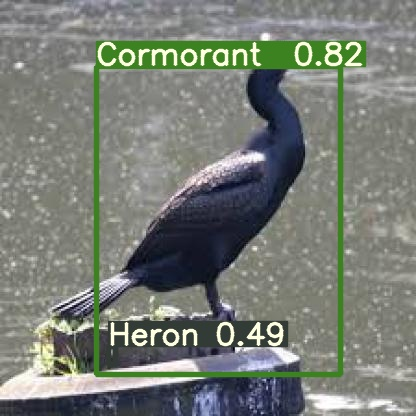

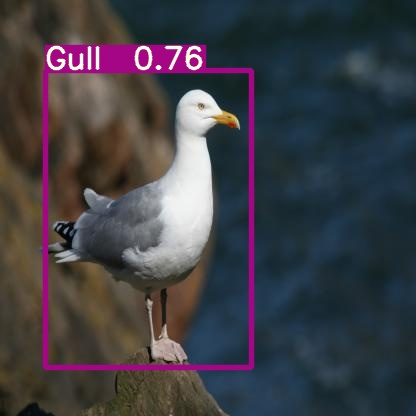

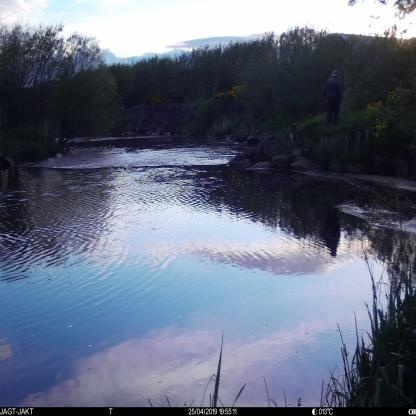

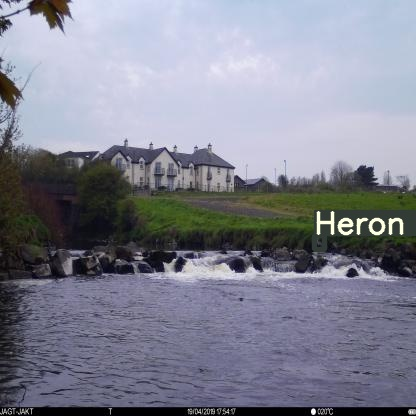

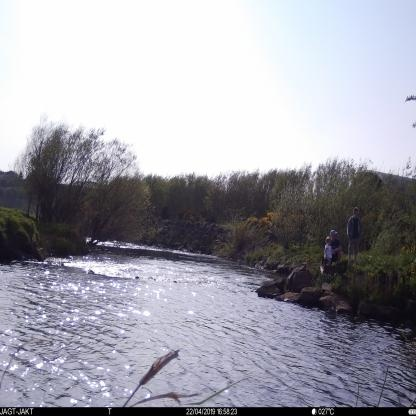

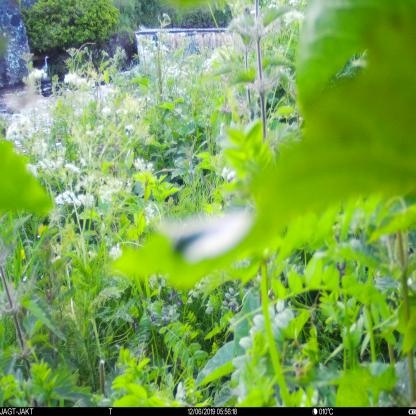

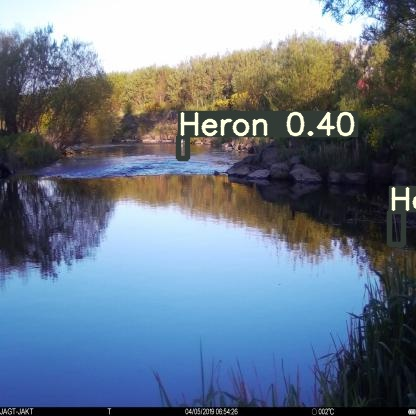

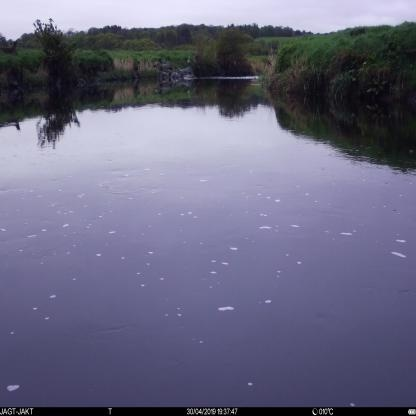

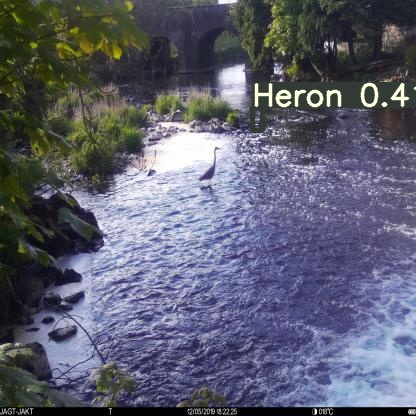

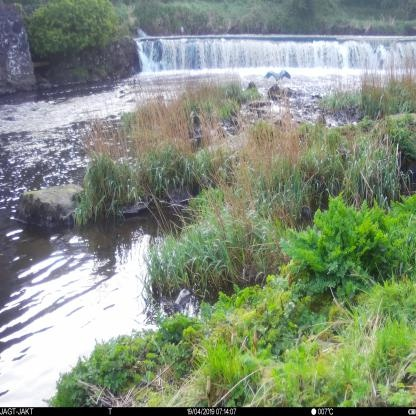

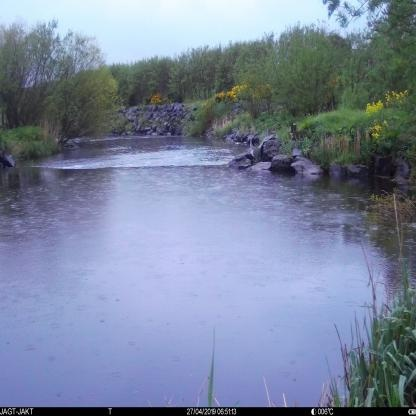

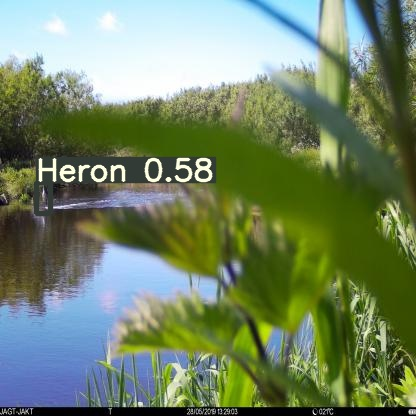

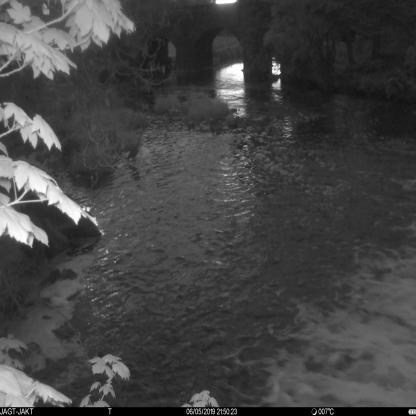

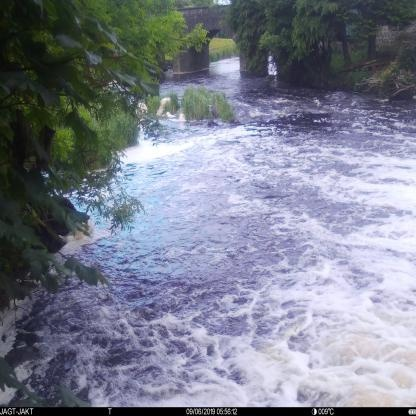

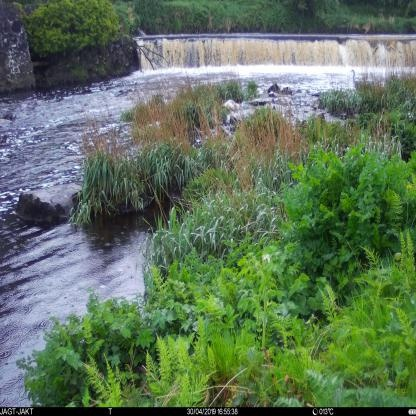

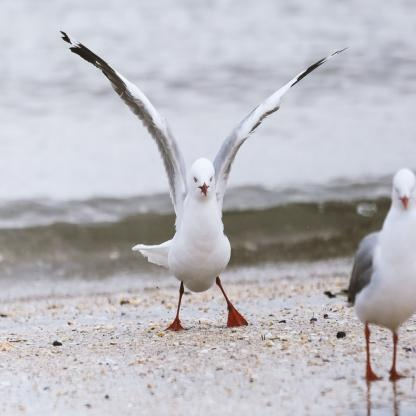

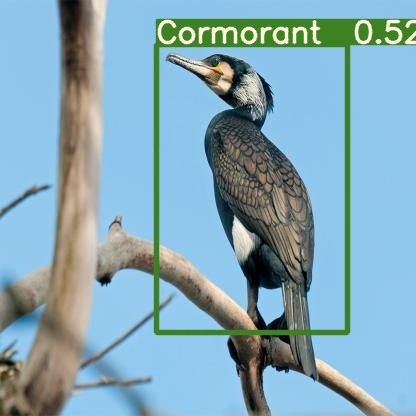

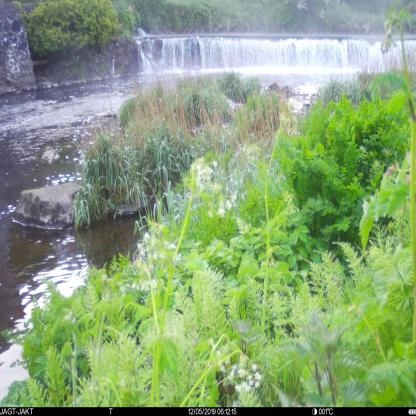

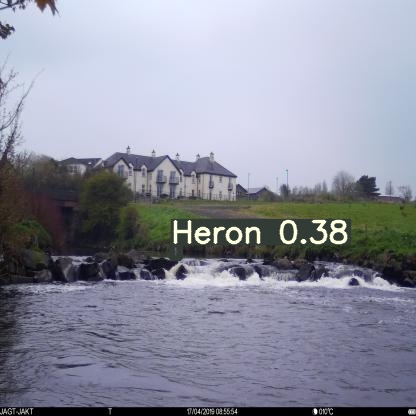

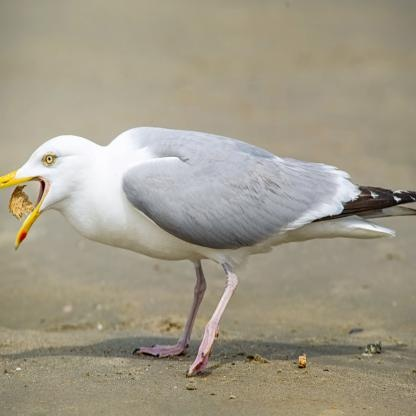

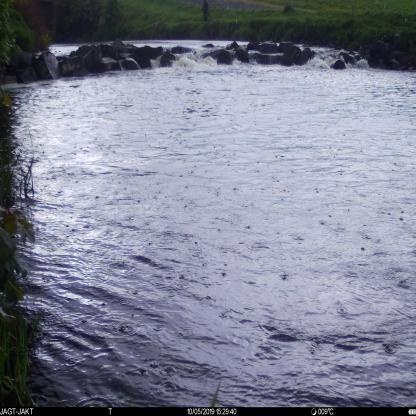

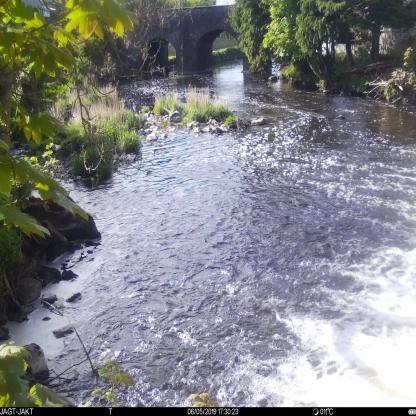

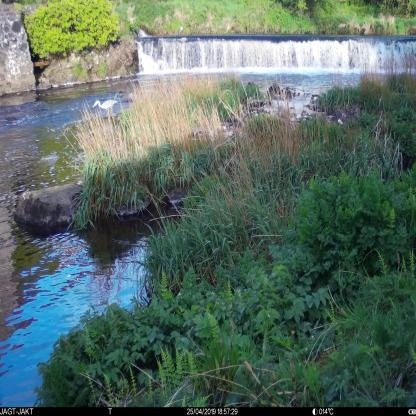

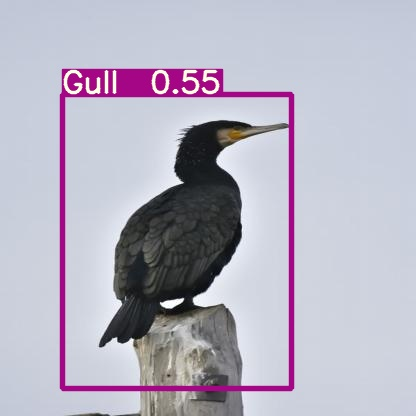

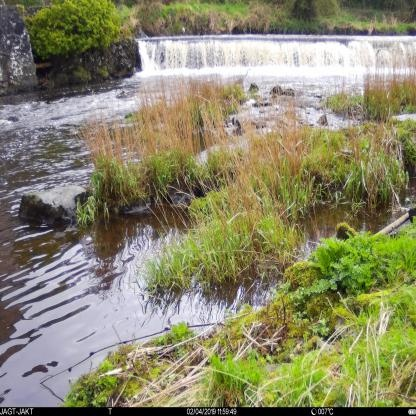

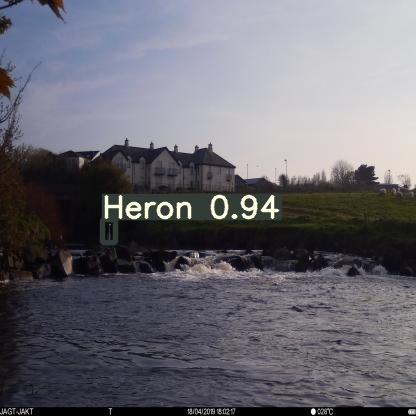

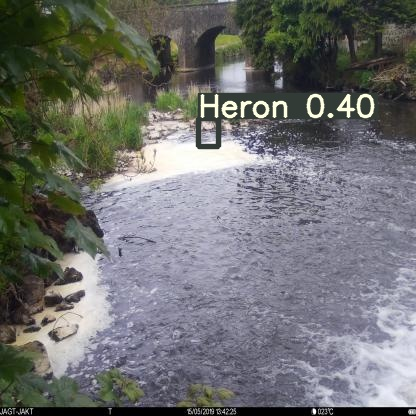

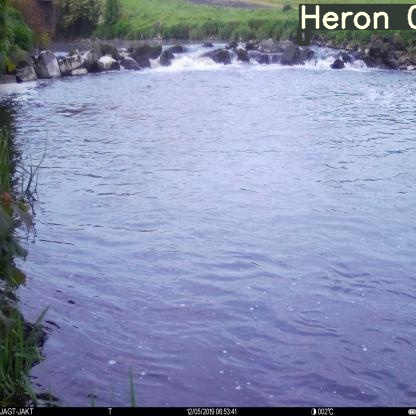

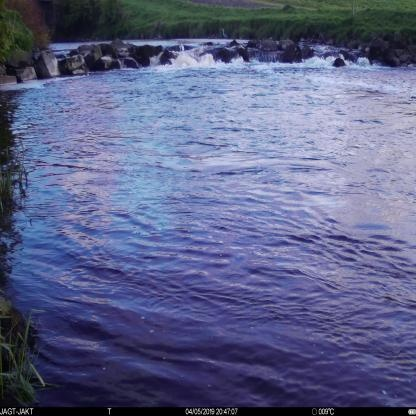

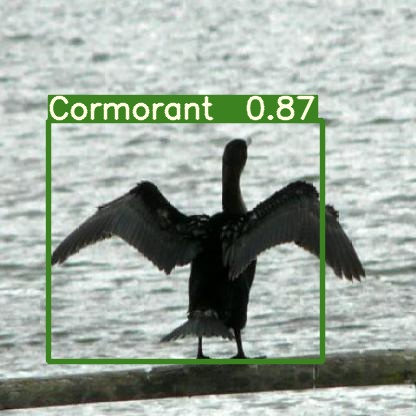

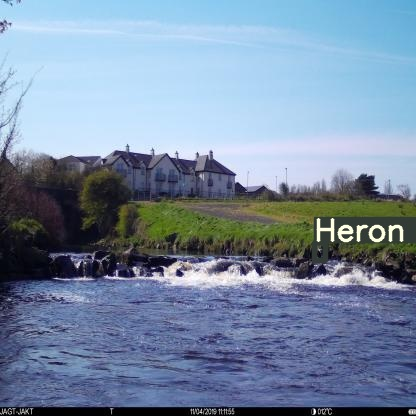

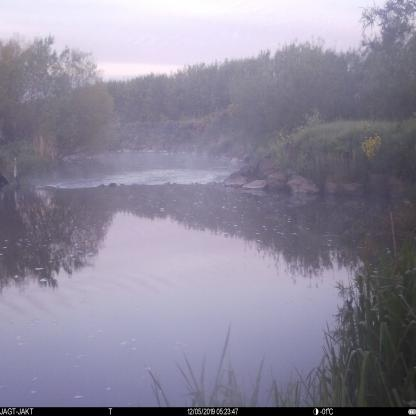

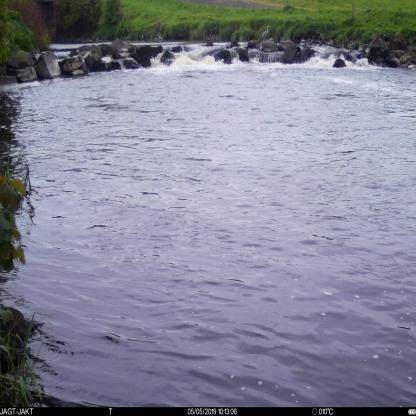

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#Moves trained weights to Google drive
%cp /content/yolov5/weights/last_yolov5s_results.pt /content/gdrive/My\ Drive